## INTRODUCTION
In this notebook, I take the average of the median speed in each neighborhood to see which neighboorhood would be the best to drive in and at the same time also the safest. 

In [ ]:
import pandas as p
import matplotlib.pyplot as plt 
df = p.read_csv("speed-limit.csv")

In [3]:
df.head()

,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,25.0,...,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
1,1026101993,140,1.121444e+09,2019-01-24,NaN,NaN,NaN,NaN,Intersection Study,NaN,...,-79.952249,40.466157,Central Lawrenceville,7.0,9.0,42003090200,2.0,9.0,2.0,3-6
2,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,35.0,...,-80.076469,40.460717,Windgap,2.0,28.0,42003563000,5.0,28.0,6.0,1-16
3,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,25.0,...,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
4,1039546167,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-80.019211,40.490794,Perry North,1.0,26.0,42003260200,1.0,26.0,1.0,1-15


In [4]:
df.neighborhood.value_counts()

Squirrel Hill South    28
Bloomfield             21
Shadyside              18
Highland Park          16
East Liberty           16
                       ..
Allegheny Center        1
Upper Lawrenceville     1
Duquesne Heights        1
Regent Square           1
Crawford-Roberts        1
Name: neighborhood, Length: 74, dtype: int64

In [5]:
df2 = df[["median_speed", "neighborhood"]]

In [6]:
df2.head()

,median_speed,neighborhood
0,29.0,Polish Hill
1,NaN,Central Lawrenceville
2,33.0,Windgap
3,28.0,Squirrel Hill South
4,NaN,Perry North


In [7]:
df3 = df2.dropna()

In [8]:
df3.head()

,median_speed,neighborhood
0,29.0,Polish Hill
2,33.0,Windgap
3,28.0,Squirrel Hill South
5,19.0,Central Northside
7,26.0,Polish Hill


In [9]:
df3.head(10)

,median_speed,neighborhood
0,29.0,Polish Hill
2,33.0,Windgap
3,28.0,Squirrel Hill South
5,19.0,Central Northside
7,26.0,Polish Hill
10,28.0,Squirrel Hill South
11,29.0,Greenfield
13,22.0,Bluff
14,37.0,Crafton Heights
15,26.0,Shadyside


In [10]:
df4 = df3.sort_values(["median_speed"])\
                        .groupby('neighborhood')\
                        .mean()\
                        .reset_index()
df4_sorted=df4.sort_values('median_speed', ascending = False)

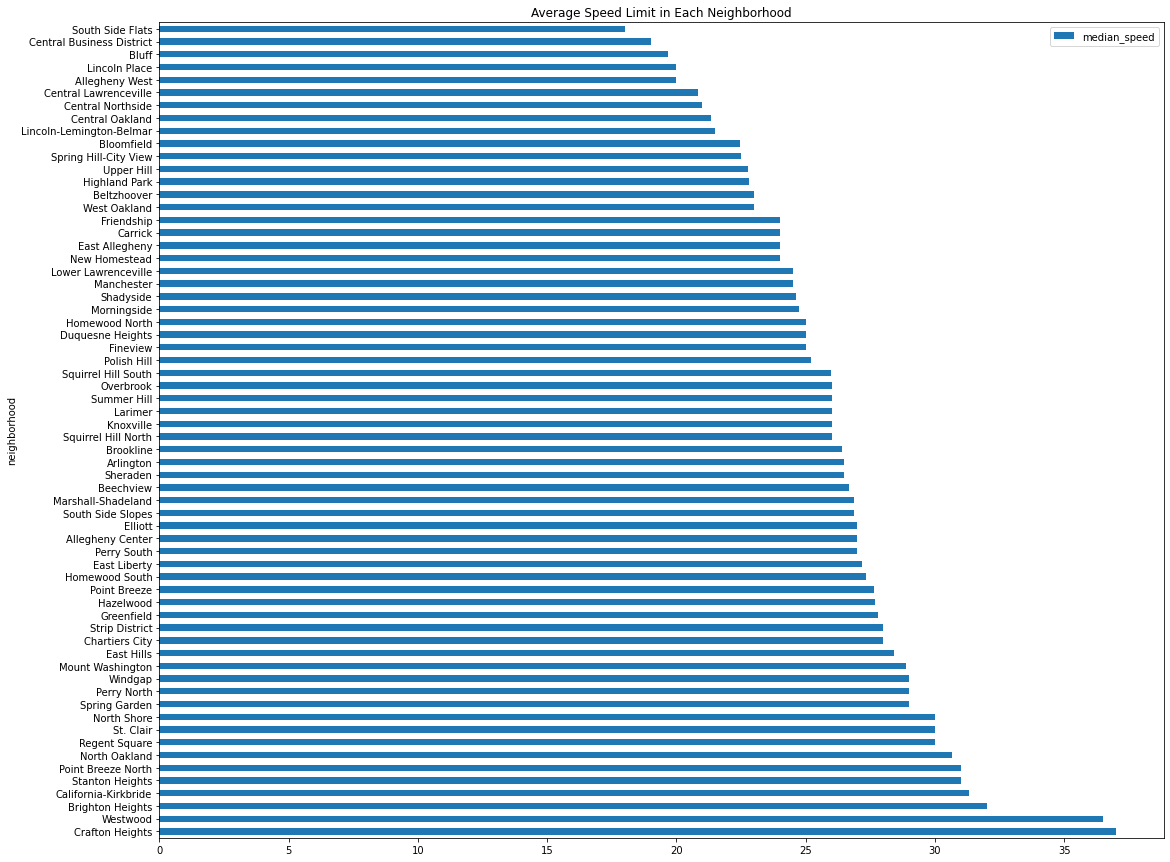

In [11]:
ax_sort = df4_sorted.plot.barh(x = "neighborhood", y = "median_speed", figsize = (18,15), title = "Average Speed Limit in Each Neighborhood" )

## CONCLUSION
In conclusion, based on the data, we can see that South Side Flats has the lowest median speed out of all the neighboorhoods in Pittsburgh making it one of the safer neighboorhoods to drive in.  